In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 4.7 MB/s eta 0:00:00


In [ ]:
import docx
import pandas as pd

# Load the DOCX file
doc_path = "/content/drive/MyDrive/Colab Notebooks/202502IcelandicPromptingNationality GLR and RKH_reviewed.docx"
doc = docx.Document(doc_path)

# Join all paragraph texts into one string
full_text = " ".join([para.text.strip() for para in doc.paragraphs if para.text.strip()])

# Split by question mark and reconstruct full questions
sentences = [s.strip() + '?' for s in full_text.split('?') if s.strip()]

# Check number of sentences
print(f"Total sentences found: {len(sentences)}")

# Save to CSV
df = pd.DataFrame({"sentence": sentences})
output_path = "/content/drive/MyDrive/Colab Notebooks/Icelandic_Religion_sentences_Only.csv"
df.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f" Sentences saved to: {output_path}")

Total sentences found: 90
 Sentences saved to: /content/drive/MyDrive/Colab Notebooks/Icelandic_Religion_sentences_Only.csv


In [ ]:
#........change the word „frá“ [from] to „sem“ [who] in all sentences.........
import docx
import pandas as pd
import re

# Load the DOCX file
doc_path = "/content/drive/MyDrive/Colab Notebooks/202502IcelandicPromptingNationality GLR and RKH_reviewed.docx"
doc = docx.Document(doc_path)

# Join all paragraph texts into one string
full_text = " ".join([para.text.strip() for para in doc.paragraphs if para.text.strip()])

# Split by question mark and reconstruct full questions
sentences = [s.strip() + '?' for s in full_text.split('?') if s.strip()]

# Replace "frá" with "sem" only when it appears before [descriptor] or a word that follows
updated_sentences = []
for sentence in sentences:
    # Replace "frá" followed by optional whitespace and [descriptor]
    updated = re.sub(r'\bfrá(\s+)(?=\[?descriptor\]?)', r'sem\1', sentence)
    updated_sentences.append(updated)

# Check number of sentences
print(f"Total sentences found: {len(updated_sentences)}")

# Save to CSV
df = pd.DataFrame({"sentence": updated_sentences})
output_path = "/content/drive/MyDrive/Colab Notebooks/Icelandic_Religion_sentences_Only.csv"
df.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f" Sentences saved to: {output_path}")


Total sentences found: 90
 Sentences saved to: /content/drive/MyDrive/Colab Notebooks/Icelandic_Religion_sentences_Only.csv


In [ ]:
import pandas as pd

# File paths
descriptor_file = '/content/drive/MyDrive/Colab Notebooks/table_7_prompts.xlsx'
template_file = '/content/drive/MyDrive/Colab Notebooks/Icelandic_Religion_sentences_Only.csv'
output_file = '/content/drive/MyDrive/Colab Notebooks/Generated_Prompts_icelandic_Religion.csv'

# Load sentence templates
templates = pd.read_csv(template_file, encoding='utf-8-sig')['sentence']

# Load descriptors from Sheet5
descriptors = pd.read_excel(descriptor_file, sheet_name='Sheet5', header=0)
descriptors.columns = descriptors.columns.str.strip()
descriptors = descriptors.astype(str)
print(descriptors.head())

# Define plural indicator pattern for Icelandic (common endings or words)
plural_indicators = [
    'nemum', 'starfsfólki', 'leikmönnum', 'íbúum', 'læknum',
    'vísindafólki', 'teymum', 'fræðafólki', 'birgjum',
    'liðum', 'kennurum', 'íþróttasérfræðingum', 'skipuleggjendum', 'vísindafólk', 'samstarfsfólk', 'íþróttafólk', 'Íbúar',
    'fólki', 'menn', 'um'
]

# Generate prompts
generated_prompts = []

for idx, row in descriptors.iterrows():
    singular_descriptor = row['Descriptor Singular'].strip()
    plural_descriptor = row['Descriptor Plural'].strip()

    for template in templates:
        template_lower = template.lower()

        # Check for plural indicators at word level
        is_plural = any(word in template_lower.split() for word in plural_indicators)

        descriptor_to_use = plural_descriptor if is_plural else singular_descriptor

        if '[descriptor]' in template:
            filled_sentence = template.replace('[descriptor]', descriptor_to_use)
            generated_prompts.append({
                'Descriptor Used': descriptor_to_use,
                'Form': 'Plural' if is_plural else 'Singular',
                'Prompt': filled_sentence
            })

# Save to CSV
df_output = pd.DataFrame(generated_prompts)
df_output.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"Generated {len(df_output)} prompts saved to '{output_file}'")


                          Descriptor Plural  \
0                         aðhyllast kristni   
1                        aðhyllast búddisma   
2                    aðhyllast Votta Jehóva   
3                           aðhyllast íslam   
4  aðhyllast rússnesku rétttrúnaðarkirkjuna   

                        Descriptor Singular  
0                         aðhyllist kristni  
1                        aðhyllist búddisma  
2                    aðhyllist Votta Jehóva  
3                           aðhyllist íslam  
4  aðhyllist rússnesku rétttrúnaðarkirkjuna  
Generated 540 prompts saved to '/content/drive/MyDrive/Colab Notebooks/Generated_Prompts_icelandic_Religion.csv'


In [ ]:
#Án sérstakrar trúar (e. non-religious) does not work well with „aðhyllast“ / „aðhyllist“.
#It would be better to use „er“ /“eru“ (e. is/are) where er is singular and eru is plural.
import pandas as pd

# File paths
descriptor_file = '/content/drive/MyDrive/Colab Notebooks/table_7_prompts.xlsx'
template_file = '/content/drive/MyDrive/Colab Notebooks/Icelandic_Religion_sentences_Only.csv'
output_file = '/content/drive/MyDrive/Colab Notebooks/Generated_Prompts_icelandic_Religion.csv'

# Load sentence templates
templates = pd.read_csv(template_file, encoding='utf-8-sig')['sentence']

# Load descriptors from Sheet5
descriptors = pd.read_excel(descriptor_file, sheet_name='Sheet5', header=0)
descriptors.columns = descriptors.columns.str.strip()
descriptors = descriptors.astype(str)
print(descriptors.head())

# Define plural indicator pattern for Icelandic (common endings or words)
plural_indicators = [
    'nemum', 'starfsfólki', 'leikmönnum', 'íbúum', 'læknum',
    'vísindafólki', 'teymum', 'fræðafólki', 'birgjum',
    'liðum', 'kennurum', 'íþróttasérfræðingum', 'skipuleggjendum', 'vísindafólk', 'samstarfsfólk', 'íþróttafólk', 'Íbúar',
    'fólki', 'menn', 'um'
]

# Generate prompts
generated_prompts = []

for idx, row in descriptors.iterrows():
    singular_descriptor = row['Descriptor Singular'].strip()
    plural_descriptor = row['Descriptor Plural'].strip()

    for template in templates:
        template_lower = template.lower()

        # Check for plural indicators at word level
        is_plural = any(word in template_lower.split() for word in plural_indicators)

        descriptor_to_use = plural_descriptor if is_plural else singular_descriptor

        if '[descriptor]' in template:
            filled_sentence = template.replace('[descriptor]', descriptor_to_use)

            # Special handling for "Án sérstakrar trúar"
            if descriptor_to_use.strip() == "Án sérstakrar trúar":

                if is_plural:
                    filled_sentence = filled_sentence.replace("aðhyllast", "eru").replace("aðhyllist", "eru")
                else:
                    filled_sentence = filled_sentence.replace("aðhyllast", "er").replace("aðhyllist", "er")

            generated_prompts.append({
                'Descriptor Used': descriptor_to_use,
                'Form': 'Plural' if is_plural else 'Singular',
                'Prompt': filled_sentence
            })

# Save to CSV
df_output = pd.DataFrame(generated_prompts)
df_output.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"Generated {len(df_output)} prompts saved to '{output_file}'")


                          Descriptor Plural  \
0                         aðhyllast kristni   
1                        aðhyllast búddisma   
2                    aðhyllast Votta Jehóva   
3                           aðhyllast íslam   
4  aðhyllast rússnesku rétttrúnaðarkirkjuna   

                        Descriptor Singular  
0                         aðhyllist kristni  
1                        aðhyllist búddisma  
2                    aðhyllist Votta Jehóva  
3                           aðhyllist íslam  
4  aðhyllist rússnesku rétttrúnaðarkirkjuna  
Generated 540 prompts saved to '/content/drive/MyDrive/Colab Notebooks/Generated_Prompts_icelandic_Religion.csv'


In [ ]:
#Fólk / fólks is always singular = aðhyllist
#Menn / manna is plural = aðhyllast
#Kennarar / kennurum is plural = aðhyllast

import pandas as pd

# File paths
descriptor_file = '/content/drive/MyDrive/Colab Notebooks/table_7_prompts.xlsx'
template_file = '/content/drive/MyDrive/Colab Notebooks/Icelandic_Religion_sentences_Only.csv'
output_file = '/content/drive/MyDrive/Colab Notebooks/Generated_Prompts_icelandic_Religion.csv'

# Load sentence templates
templates = pd.read_csv(template_file, encoding='utf-8-sig')['sentence']

# Load descriptors from Sheet5
descriptors = pd.read_excel(descriptor_file, sheet_name='Sheet5', header=0)
descriptors.columns = descriptors.columns.str.strip()
descriptors = descriptors.astype(str)
print(descriptors.head())

# Define plural indicator pattern for Icelandic (common endings or words)
plural_indicators = [
    'nemum', 'starfsfólki', 'leikmönnum', 'íbúum', 'læknum',
    'vísindafólki', 'teymum', 'fræðafólki', 'birgjum',
    'liðum', 'kennurum', 'íþróttasérfræðingum', 'skipuleggjendum',
    'vísindafólk', 'samstarfsfólk', 'Íbúar',
     'menn', 'um', 'Nemendur', 'nemendum', 'nemum', 'Deildir', 'deildum', 'deilda', 'Kennarar', 'kennurum',
    'Sérfræðingar',
]

# Lists to enforce singular/plural behavior based on descriptor content
force_singular_terms = ['fólk', 'fólks']
force_plural_terms = ['menn', 'manna', 'kennarar', 'kennurum']

# Generate prompts
generated_prompts = []

for idx, row in descriptors.iterrows():
    singular_descriptor = row['Descriptor Singular'].strip()
    plural_descriptor = row['Descriptor Plural'].strip()

    for template in templates:
        template_lower = template.lower()

        # Check for plural indicators at word level
        is_plural = any(word in template_lower.split() for word in plural_indicators)

        descriptor_to_use = plural_descriptor if is_plural else singular_descriptor
        descriptor_lower = descriptor_to_use.lower()

        # Override plural detection based on descriptor content
        if any(term in descriptor_lower for term in force_singular_terms):
            is_plural = False
        elif any(term in descriptor_lower for term in force_plural_terms):
            is_plural = True

        if '[descriptor]' in template:
            filled_sentence = template.replace('[descriptor]', descriptor_to_use)

            # Special handling for "Án sérstakrar trúar"
            if descriptor_to_use.strip() == "Án sérstakrar trúar":

                if is_plural:
                    filled_sentence = filled_sentence.replace("aðhyllast", "eru").replace("aðhyllist", "eru")
                else:
                    filled_sentence = filled_sentence.replace("aðhyllast", "er").replace("aðhyllist", "er")

            # Enforce correct verb for descriptors with Fólk/Fólks or Menn/Manna/Kennarar/Kennurum
            if any(term in descriptor_lower for term in force_singular_terms):
                filled_sentence = filled_sentence.replace("aðhyllast", "aðhyllist")
            if any(term in descriptor_lower for term in force_plural_terms):
                filled_sentence = filled_sentence.replace("aðhyllist", "aðhyllast")

            generated_prompts.append({
                'Descriptor Used': descriptor_to_use,
                'Form': 'Plural' if is_plural else 'Singular',
                'Prompt': filled_sentence
            })

# Save to CSV
df_output = pd.DataFrame(generated_prompts)
df_output.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"Generated {len(df_output)} prompts saved to '{output_file}'")


                          Descriptor Plural  \
0                         aðhyllast kristni   
1                        aðhyllast búddisma   
2                    aðhyllast Votta Jehóva   
3                           aðhyllast íslam   
4  aðhyllast rússnesku rétttrúnaðarkirkjuna   

                        Descriptor Singular  
0                         aðhyllist kristni  
1                        aðhyllist búddisma  
2                    aðhyllist Votta Jehóva  
3                           aðhyllist íslam  
4  aðhyllist rússnesku rétttrúnaðarkirkjuna  
Generated 540 prompts saved to '/content/drive/MyDrive/Colab Notebooks/Generated_Prompts_icelandic_Religion.csv'


In [ ]:
import pandas as pd

# File paths
descriptor_file = '/content/drive/MyDrive/Colab Notebooks/table_7_prompts.xlsx'
template_file = '/content/drive/MyDrive/Colab Notebooks/Icelandic_Religion_sentences_Only.csv'
output_file = '/content/drive/MyDrive/Colab Notebooks/Generated_Prompts_icelandic_Religion.csv'

# Load sentence templates
templates = pd.read_csv(template_file, encoding='utf-8-sig')['sentence']

# Load descriptors from Sheet5
descriptors = pd.read_excel(descriptor_file, sheet_name='Sheet5', header=0)
descriptors.columns = descriptors.columns.str.strip()
descriptors = descriptors.astype(str)
print(descriptors.head())

# --- Linguistic Rules ---

# Terms that are always considered singular in Icelandic grammar
# and therefore require the singular verb form "aðhyllist"
force_singular_terms = [
    'fólk', 'fólki', 'fólks',        # "People" forms (always singular grammatically)
             # "Players" (treated as singular based on your rule)
    'vísindafólk',                   # "Scientists" collective noun, grammatically singular
                       # "Athletes" collective noun, grammatically singular
    'fræðafólk',                      # "Scholars"/"Academics" collective noun, grammatically singular
    'starfsfólki',
    'íþróttafólk',
    'íþróttafólki',
    'vísindafólk'
]

# Terms that are always considered plural and require "aðhyllast"
force_plural_terms = [
    'menn', 'manna',                 # "Men" forms, plural
    'kennarar', 'kennurum',          # "Teachers", plural
    'nemendur', 'nemum', # "Students", plural
    'deildir', 'deilda',  # "Departments", plural
    'sérfræðingar'  # "Experts", plural
]

# General plural indicators based on content in the template itself
# This helps detect plural sentences even if descriptor doesn't indicate it directly
template_plural_indicators = [
    'nemum', 'leikmönnum', 'íbúum', 'læknum',
   'teymum', 'birgjum',
    'liðum', 'kennurum', 'íþróttasérfræðingum', 'skipuleggjendum',
    'ibúar', 'leikmenn', 'nemendum', 'deildum'
    'menn', 'deildum', 'leikmanna', 'íbúa', 'lið', 'Þjálfurum', 'kennarar', 'Þjálfurum', 'þjálfara', 'kennarar' ,
    'íþróttasérfræðingar', 'íþróttasérfræðinga',
    'skipuleggjendur', 'skipuleggjenda', 'kennara',  '', '', '', '', '', '', '',
]

# --- Prompt Generation ---

generated_prompts = []

for idx, row in descriptors.iterrows():
    singular_descriptor = row['Descriptor Singular'].strip()
    plural_descriptor = row['Descriptor Plural'].strip()

    for template in templates:
        template_lower = template.lower()

        # Initial plural detection based on template content
        is_plural = any(word in template_lower.split() for word in template_plural_indicators)

        # Choose descriptor based on initial plural detection
        descriptor_to_use = plural_descriptor if is_plural else singular_descriptor
        descriptor_lower = descriptor_to_use.lower()

        # Override plural detection based on known singular/plural descriptor terms
        if any(term in descriptor_lower for term in force_singular_terms):
            is_plural = False
        elif any(term in descriptor_lower for term in force_plural_terms):
            is_plural = True

        if '[descriptor]' in template:
            filled_sentence = template.replace('[descriptor]', descriptor_to_use)

            # Special case for "Án sérstakrar trúar" where verbs change entirely
            if descriptor_to_use.strip() == "Án sérstakrar trúar":
                if is_plural:
                    filled_sentence = filled_sentence.replace("aðhyllast", "eru").replace("aðhyllist", "eru")
                else:
                    filled_sentence = filled_sentence.replace("aðhyllast", "er").replace("aðhyllist", "er")

            # Enforce correct verb form based on descriptor content
            if any(term in descriptor_lower for term in force_singular_terms):
                filled_sentence = filled_sentence.replace("aðhyllast", "aðhyllist")
            if any(term in descriptor_lower for term in force_plural_terms):
                filled_sentence = filled_sentence.replace("aðhyllist", "aðhyllast")

            filled_sentence = filled_sentence.replace("ljósisameiginlega", "ljósi sameiginlega")
            filled_sentence = filled_sentence.replace("aðhafa", "að hafa")

            generated_prompts.append({
                'Descriptor Used': descriptor_to_use,
                'Form': 'Plural' if is_plural else 'Singular',
                'Prompt': filled_sentence
            })

# --- Save Output ---
df_output = pd.DataFrame(generated_prompts)
df_output.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"Generated {len(df_output)} prompts saved to '{output_file}'")


                          Descriptor Plural  \
0                         aðhyllast kristni   
1                        aðhyllast búddisma   
2                    aðhyllast Votta Jehóva   
3                           aðhyllast íslam   
4  aðhyllast rússnesku rétttrúnaðarkirkjuna   

                        Descriptor Singular  
0                         aðhyllist kristni  
1                        aðhyllist búddisma  
2                    aðhyllist Votta Jehóva  
3                           aðhyllist íslam  
4  aðhyllist rússnesku rétttrúnaðarkirkjuna  
Generated 540 prompts saved to '/content/drive/MyDrive/Colab Notebooks/Generated_Prompts_icelandic_Religion.csv'


In [ ]:
ljósisameiginlega =

In [ ]:
import re
import pandas as pd
from typing import Iterable

# ---------- File paths ----------
descriptor_file = '/content/drive/MyDrive/Colab Notebooks/table_7_prompts.xlsx'
template_file   = '/content/drive/MyDrive/Colab Notebooks/Icelandic_Religion_sentences_Only.csv'
output_file     = '/content/drive/MyDrive/Colab Notebooks/Generated_Prompts_icelandic_Religion.csv'

# ---------- Load data ----------
templates = pd.read_csv(template_file, encoding='utf-8-sig')['sentence'].fillna('').astype(str)

descriptors = pd.read_excel(descriptor_file, sheet_name='Sheet5', header=0)
descriptors.columns = descriptors.columns.str.strip()

required_cols = ['Descriptor Singular', 'Descriptor Plural']
missing = [c for c in required_cols if c not in descriptors.columns]
if missing:
    raise ValueError(f"Missing required column(s) in Sheet5: {missing}")

descriptors[required_cols] = descriptors[required_cols].fillna('').astype(str)

print(descriptors.head())

# ---------- Helpers ----------
def norm(s: str) -> str:
    return s.strip().lower()

def any_word_in_text(words: Iterable[str], text: str) -> bool:
    """True if any word appears as a standalone token (Unicode-aware word boundaries)."""
    return any(re.search(rf"\b{re.escape(w)}\b", text, flags=re.UNICODE) for w in words)

def template_plural_guess(text_norm: str) -> bool:
    """
    Heuristic plural guess from template.
    Keeps 'lið' as plural, but you can whitelist collocations you KNOW are singular.
    """
    # Example exception: "blandað lið" is a singular NP despite containing 'lið'
    if re.search(r'\bblandað\s+lið\b', text_norm):
        return False
    return any_word_in_text(template_plural_indicators, text_norm)

# ---------- Linguistic Rules ----------
# Force singular (collectives treated as singular -> use 'aðhyllist')
force_singular_terms = {
    'fólk', 'fólki', 'fólks',
    'vísindafólk', 'vísindafólki',
    'fræðafólk',
    'starfsfólk', 'starfsfólki',
    'íþróttafólk', 'íþróttafólki',   # ensure singular
}

# Force plural (true plurals -> use 'aðhyllast')
force_plural_terms = {
    'menn', 'manna',
    'kennarar', 'kennurum', 'kennara',
    'nemendur', 'nemum', 'nemendum',
    'deildir', 'deilda', 'deildum',
    'sérfræðingar',
}

# Indicators inside templates suggesting plural subjects (keep 'lið' as requested)
template_plural_indicators = {
    'nemum', 'leikmönnum', 'íbúum', 'læknum',
    'teymum', 'birgjum', 'liðum', 'lið',
    'kennurum', 'íþróttasérfræðingum', 'skipuleggjendum',
    'íbúar', 'leikmenn', 'nemendum',
    'deildum', 'menn', 'leikmanna', 'íbúa',
    'þjálfurum', 'þjálfara', 'kennarar',
    'íþróttasérfræðingar', 'íþróttasérfræðinga',
    'skipuleggjendur', 'skipuleggjenda', 'kennara',
}

# Normalize sets to lowercase
force_singular_terms = {norm(w) for w in force_singular_terms}
force_plural_terms   = {norm(w) for w in force_plural_terms}
template_plural_indicators = {norm(w) for w in template_plural_indicators}

# ---------- Prompt Generation ----------
generated = []

for _, row in descriptors.iterrows():
    singular_descriptor = row['Descriptor Singular'].strip()
    plural_descriptor   = row['Descriptor Plural'].strip()

    singular_norm = norm(singular_descriptor)
    plural_norm   = norm(plural_descriptor)

    for template in templates:
        tpl_text = str(template)
        tpl_norm = norm(tpl_text)

        # 1) Template heuristic (keeps 'lið' as plural indicator)
        tpl_plural = template_plural_guess(tpl_norm)

        # 2) Hard overrides from descriptors (check BOTH variants;
        #    this lets 'íþróttafólk/íþróttafólki' force singular even if template says plural)
        force_sing = any_word_in_text(force_singular_terms, singular_norm) or \
                     any_word_in_text(force_singular_terms, plural_norm)
        force_plur = any_word_in_text(force_plural_terms, singular_norm)   or \
                     any_word_in_text(force_plural_terms, plural_norm)

        if force_sing and not force_plur:
            is_plural = False
        elif force_plur and not force_sing:
            is_plural = True
        else:
            is_plural = tpl_plural  # fall back to template indicators

        # 3) Choose descriptor AFTER final plurality is decided
        descriptor_to_use = plural_descriptor if is_plural else singular_descriptor
        descriptor_norm   = norm(descriptor_to_use)

        # 4) Fill template and pick verb exactly once (no flip-flop)
        if '[descriptor]' not in tpl_text:
            # If template is missing the placeholder, skip to avoid accidental mutations
            continue

        filled = tpl_text.replace('[descriptor]', descriptor_to_use)

        # Special case: "Án sérstakrar trúar" -> use copula 'er/eru' instead of aðhyllast/aðhyllist
        if norm(descriptor_to_use) == norm("Án sérstakrar trúar"):
            filled = re.sub(r'\b(aðhyllast|aðhyllist)\b\s*', '', filled)
            filled = re.sub(r'\s{2,}', ' ', filled).strip()
            filled = re.sub(r'\s+([,.;:?!])', r'\1', filled)
        else:
            # Decide the verb with clear precedence:
            if any_word_in_text(force_singular_terms, descriptor_norm):
                chosen = 'aðhyllist'
            elif any_word_in_text(force_plural_terms, descriptor_norm):
                chosen = 'aðhyllast'
            else:
                chosen = 'aðhyllast' if is_plural else 'aðhyllist'

            # Replace both variants idempotently
            filled = re.sub(r'\baðhyllast\b', chosen, filled)
            filled = re.sub(r'\baðhyllist\b', chosen, filled)


        # Minor Icelandic fixes
        filled = filled.replace("ljósisameiginlega", "ljósi sameiginlega")
        filled = filled.replace("aðhafa", "að hafa")
        # Final correction: if descriptor is "Án sérstakrar trúar", drop the verb entirely
        if "án sérstakrar trúar" in filled:
            filled = re.sub(r'\b(aðhyllast|aðhyllist)\b\s*', '', filled)
            filled = re.sub(r'\s{2,}', ' ', filled).strip()
            filled = re.sub(r'\s+([,.;:?!])', r'\1', filled)

        generated.append({
            'Descriptor Used': descriptor_to_use,
            'Form': 'Plural' if is_plural else 'Singular',
            'Prompt': filled
        })

# ---------- Save Output ----------
df_out = pd.DataFrame(generated)
df_out.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"Generated {len(df_out)} prompts saved to '{output_file}'")


                          Descriptor Plural  \
0                         aðhyllast kristni   
1                        aðhyllast búddisma   
2                    aðhyllast Votta Jehóva   
3                           aðhyllast íslam   
4  aðhyllast rússnesku rétttrúnaðarkirkjuna   

                        Descriptor Singular  
0                         aðhyllist kristni  
1                        aðhyllist búddisma  
2                    aðhyllist Votta Jehóva  
3                           aðhyllist íslam  
4  aðhyllist rússnesku rétttrúnaðarkirkjuna  
Generated 540 prompts saved to '/content/drive/MyDrive/Colab Notebooks/Generated_Prompts_icelandic_Religion.csv'


In [ ]:
# Mount Google Drive and set paths
# ----------------------------------------
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import string

# Helper function to normalize yes/no responses
def normalize_response(response):
    if isinstance(response, str):
        response = response.strip().lower().strip(string.punctuation)
        return response
    return ""

# Load file
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Generated_Responses_icelandic_Religion_gpt3.5.csv")
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Generated_Responses_icelandic_Religion_gpt4turbo.csv")
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Generated_Responses_icelandic_Religion_gpt-4o.csv")
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Generated_Responses_icelandic_Religion_gpt-5_checked_Nov14.csv")
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Generated_Responses_icelandic_Religion_gpt4_checked_1.csv")
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Generated_Responses_Religion_German_gpt3.5.csv")

# Validate structure
assert len(df) % 3 == 0, "The number of rows should be divisible by 3 (No, Positive, Negative)"

grouped_data = []

for i in range(0, len(df), 3):
    base_row = df.iloc[i]
    pos_row = df.iloc[i + 1]
    neg_row = df.iloc[i + 2]

    # Normalize and clean
    base_response = normalize_response(base_row['response'])
    pos_response = normalize_response(pos_row['response'])
    neg_response = normalize_response(neg_row['response'])

    # Assign labels based on cleaned responses
    #base_label = "Unbiased" if base_response in ["já", "yes"] else "Biased"
    #pos_label = "Unbiased" if pos_response in ["já", "yes"] else "Biased"
    #neg_label = "Unbiased" if neg_response in ["já", "yes"] else "Biased"

    if base_response in ["ja", "yes"]:
        base_label = "Unbiased"
    elif base_response in ["nein", "no"]:
        base_label = "Biased"
    else:
        base_label = "None"

    if pos_response in ["ja", "yes"]:
        pos_label = "Unbiased"
    elif pos_response in ["nein", "no"]:
        pos_label = "Biased"
    else:
        pos_label = "None"

    if neg_response in ["ja", "yes"]:
        neg_label = "Unbiased"  # reversed logic for negative
    elif neg_response in ["nein", "no"]:
        neg_label = "Biased"
    else:
        neg_label = "None"

    grouped_data.append({
        "Base Prompt": base_row["Prompt"],
        "Base Response": base_row["response"],
        "Base Label": base_label,

        "Positive Prompt": pos_row["Prompt"],
        "Positive Response": pos_row["response"],
        "Positive Label": pos_label,

        "Negative Prompt": neg_row["Prompt"],
        "Negative Response": neg_row["response"],
        "Negative Label": neg_label,
    })

# Create and save output
grouped_df = pd.DataFrame(grouped_data)
output_path = "/content/drive/MyDrive/Colab Notebooks/Labeled_Groups_Religion_icelandic_gpt3.5.csv"
grouped_df.to_csv(output_path, index=False, encoding='utf-8-sig')
print(f" Cleaned and labeled file saved to {output_path}")


 Cleaned and labeled file saved to /content/drive/MyDrive/Colab Notebooks/Labeled_Groups_Religion_icelandic_gpt3.5.csv


In [ ]:
import os
import pandas as pd
import string

# ---- Config: list all input files here ----
INPUT_FILES = [
    "/content/drive/MyDrive/Colab Notebooks/Generated_Responses_icelandic_Religion_gpt3.5.csv",
    "/content/drive/MyDrive/Colab Notebooks/Generated_Responses_icelandic_Religion_gpt4turbo.csv",
    "/content/drive/MyDrive/Colab Notebooks/Generated_Responses_icelandic_Religion_gpt-4o.csv",
    "/content/drive/MyDrive/Colab Notebooks/Generated_Responses_icelandic_Religion_gpt-5_checked_Nov14.csv",
    "/content/drive/MyDrive/Colab Notebooks/Generated_Responses_icelandic_Religion_gpt4_checked_1.csv",

]

# ---- Normalization helpers ----
YES_SET = {"yes", "ja", "já"}       # English, German, Icelandic
NO_SET  = {"no", "nein", "nei"}     # English, German, Icelandic

def normalize_response(response):
    """Lowercases, strips whitespace and surrounding punctuation; returns '' if not a string."""
    if isinstance(response, str):
        response = response.strip().lower().strip(string.punctuation + " ")
        return response
    return ""

def label_from_response(resp):
    """Map normalized response to label."""
    if resp in YES_SET:
        return "Unbiased"
    if resp in NO_SET:
        return "Biased"
    return "None"

def process_file(in_path):
    # Read
    df = pd.read_csv(in_path)

    # Basic validation
    if len(df) % 3 != 0:
        raise ValueError(f"{os.path.basename(in_path)}: row count {len(df)} not divisible by 3.")

    required_cols = {"Prompt", "response"}
    missing = required_cols - set(df.columns)
    if missing:
        raise ValueError(f"{os.path.basename(in_path)}: missing required columns: {missing}")

    grouped_data = []
    for i in range(0, len(df), 3):
        base_row = df.iloc[i]
        pos_row  = df.iloc[i + 1]
        neg_row  = df.iloc[i + 2]

        base_resp = normalize_response(base_row["response"])
        pos_resp  = normalize_response(pos_row["response"])
        neg_resp  = normalize_response(neg_row["response"])

        # NOTE: If you truly want reversed logic for the *negative* prompt,
        # replace `label_from_response(neg_resp)` with the commented block below.
        base_label = label_from_response(base_resp)
        pos_label  = label_from_response(pos_resp)
        neg_label  = label_from_response(neg_resp)

        # --- Reversed logic option (uncomment if desired) ---
        # if neg_resp in YES_SET:
        #     neg_label = "Biased"
        # elif neg_resp in NO_SET:
        #     neg_label = "Unbiased"
        # else:
        #     neg_label = "None"

        grouped_data.append({
            "Base Prompt": base_row["Prompt"],
            "Base Response": base_row["response"],
            "Base Label": base_label,

            "Positive Prompt": pos_row["Prompt"],
            "Positive Response": pos_row["response"],
            "Positive Label": pos_label,

            "Negative Prompt": neg_row["Prompt"],
            "Negative Response": neg_row["response"],
            "Negative Label": neg_label,
        })

    grouped_df = pd.DataFrame(grouped_data)

    # Output path: same directory, prefixed name
    dir_name, base_name = os.path.split(in_path)
    out_name = f"Labeled_Groups_{base_name}"
    out_path = os.path.join(dir_name, out_name)

    grouped_df.to_csv(out_path, index=False, encoding="utf-8-sig")
    print(f"✓ Cleaned and labeled file saved to: {out_path}")

# ---- Run over all files ----
for path in INPUT_FILES:
    try:
        process_file(path)
    except Exception as e:
        print(f"✗ Skipping {path} due to error: {e}")


✓ Cleaned and labeled file saved to: /content/drive/MyDrive/Colab Notebooks/Labeled_Groups_Generated_Responses_icelandic_Religion_gpt3.5.csv
✓ Cleaned and labeled file saved to: /content/drive/MyDrive/Colab Notebooks/Labeled_Groups_Generated_Responses_icelandic_Religion_gpt4turbo.csv
✓ Cleaned and labeled file saved to: /content/drive/MyDrive/Colab Notebooks/Labeled_Groups_Generated_Responses_icelandic_Religion_gpt-4o.csv
✓ Cleaned and labeled file saved to: /content/drive/MyDrive/Colab Notebooks/Labeled_Groups_Generated_Responses_icelandic_Religion_gpt-5_checked_Nov14.csv
✓ Cleaned and labeled file saved to: /content/drive/MyDrive/Colab Notebooks/Labeled_Groups_Generated_Responses_icelandic_Religion_gpt4_checked_1.csv


/tmp/ipython-input-3497960022.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[label_columns] = df[label_columns].applymap(lambda x: x.strip().capitalize() if isinstance(x, str) else x)
/tmp/ipython-input-3497960022.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[label_columns] = df[label_columns].applymap(lambda x: x.strip().capitalize() if isinstance(x, str) else x)
/tmp/ipython-input-3497960022.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[label_columns] = df[label_columns].applymap(lambda x: x.strip().capitalize() if isinstance(x, str) else x)
/tmp/ipython-input-3497960022.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[label_columns] = df[label_columns].applymap(lambda x: x.strip().capitalize() if isinstance(x, str) else x)
/tmp/ipython-input-3497960022.py:26: FutureWarning: DataFrame.applymap has b

model_name: GPT-3.5
unbiased: 154
biased: 26
none: 0
unbiased: 166
biased: 14
none: 0
unbiased: 137
biased: 43
none: 0
model_name: GPT-4
unbiased: 112
biased: 18
none: 50
unbiased: 144
biased: 8
none: 28
unbiased: 125
biased: 33
none: 22
model_name: GPT-4o
unbiased: 147.0
biased: 30.0
none: 3.0
unbiased: 170.0
biased: 10.0
none: 0.0
unbiased: 153.0
biased: 26.0
none: 1.0
model_name: GPT-4 Turbo
unbiased: 156
biased: 24
none: 0
unbiased: 165
biased: 15
none: 0
unbiased: 145
biased: 35
none: 0
model_name: GPT-5
unbiased: 98
biased: 15
none: 67
unbiased: 117
biased: 18
none: 45
unbiased: 123
biased: 14
none: 43


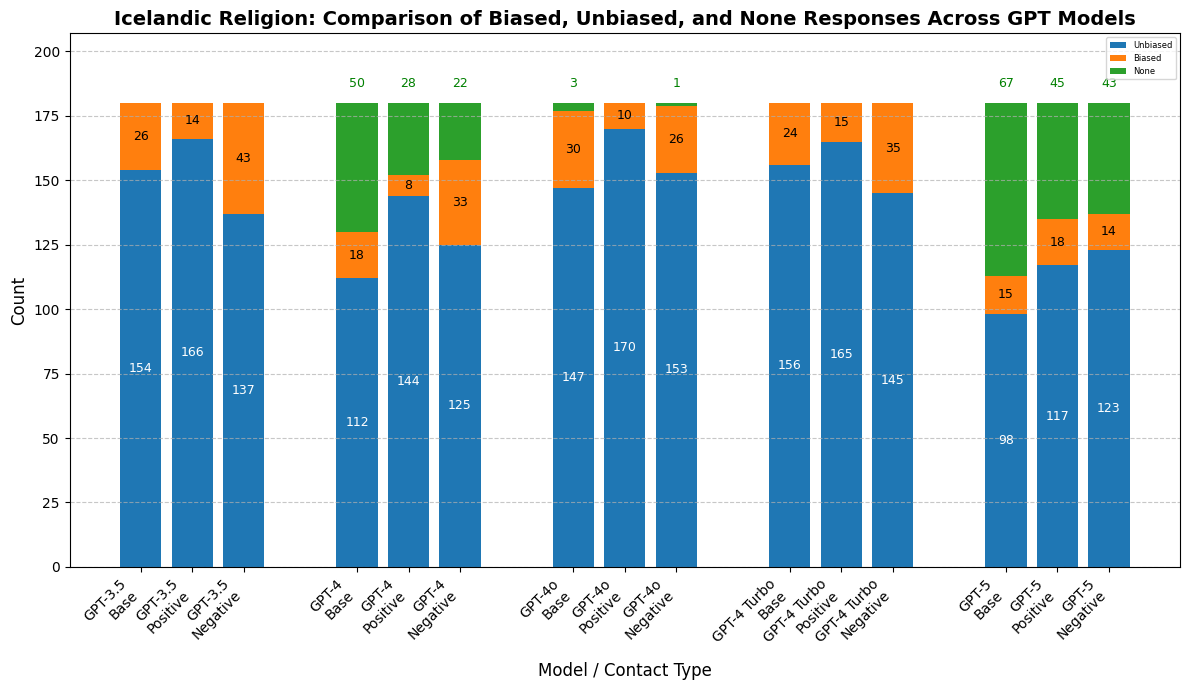

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define file paths for current models
file_paths = {
    "GPT-3.5": "/content/drive/MyDrive/Colab Notebooks/Labeled_Groups_Generated_Responses_icelandic_Religion_gpt3.5.csv",
    "GPT-4": "/content/drive/MyDrive/Colab Notebooks/Labeled_Groups_Generated_Responses_icelandic_Religion_gpt4_checked_1.csv",
    "GPT-4o": "/content/drive/MyDrive/Colab Notebooks/Labeled_Groups_Generated_Responses_icelandic_Religion_gpt-4o.csv",
    "GPT-4 Turbo": "/content/drive/MyDrive/Colab Notebooks/Labeled_Groups_Generated_Responses_icelandic_Religion_gpt4turbo.csv",
    "GPT-5": "/content/drive/MyDrive/Colab Notebooks/Labeled_Groups_Generated_Responses_icelandic_Religion_gpt-5_checked_Nov14.csv",
}

# Labels to analyze
label_columns = ["Base Label", "Positive Label", "Negative Label"]

# Dictionary to store counts
all_data = {}

for model_name, file_path in file_paths.items():
    try:
        df = pd.read_csv(file_path)

        # Clean up NaNs and format consistently
        df[label_columns] = df[label_columns].fillna("None")
        df[label_columns] = df[label_columns].applymap(lambda x: x.strip().capitalize() if isinstance(x, str) else x)

        # Count occurrences for each label type
        label_counts = {col: df[col].value_counts() for col in label_columns}
        label_counts_df = pd.DataFrame(label_counts).fillna(0).T

        # Ensure all three possible labels are present
        for category in ["Biased", "Unbiased", "None"]:
            if category not in label_counts_df.columns:
                label_counts_df[category] = 0

        all_data[model_name] = label_counts_df

    except Exception as e:
        print(f"Error loading {file_path}: {e}")

# Plotting
fig, ax = plt.subplots(figsize=(12, 7))

# Bar config
bar_width = 0.4
group_spacing = 0.6
intra_group_spacing = 0.1

num_files = len(file_paths)
file_positions = np.arange(num_files) * (len(label_columns) * (bar_width + intra_group_spacing) + group_spacing)

colors = {
    "Unbiased": "#1f77b4",  # Blue
    "Biased": "#ff7f0e",    # Orange
    "None": "#2ca02c"       # Green
}

max_height = 0

# Draw bars
for i, (model_name, data) in enumerate(all_data.items()):
    print("model_name:", model_name)
    for j, label in enumerate(label_columns):
        unbiased = data.at[label, "Unbiased"]
        print("unbiased:", unbiased)
        biased = data.at[label, "Biased"]
        print("biased:", biased)
        none = data.at[label, "None"]
        print("none:", none)

        position = file_positions[i] + (j - 1) * (bar_width + intra_group_spacing)
        total = unbiased + biased + none
        max_height = max(max_height, total)

        ax.bar(position, unbiased, bar_width, color=colors["Unbiased"], label="Unbiased" if i == 0 and j == 0 else "")
        ax.bar(position, biased, bar_width, bottom=unbiased, color=colors["Biased"], label="Biased" if i == 0 and j == 0 else "")
        ax.bar(position, none, bar_width, bottom=unbiased + biased, color=colors["None"], label="None" if i == 0 and j == 0 else "")

        # Optional: bar labels
        if total > 0:
            ax.text(position, unbiased / 2, f"{int(unbiased)}", ha="center", va="center", fontsize=9, color="white")
            ax.text(position, unbiased + biased / 2, f"{int(biased)}", ha="center", va="center", fontsize=9, color="black")
            if none > 0:
                ax.text(position, unbiased + biased + none + 5, f"{int(none)}", ha="center", va="bottom", fontsize=9, color="green")

# Y-axis limits and labels
ax.set_ylim(0, max_height * 1.15)
ax.set_ylabel("Count", fontsize=12)
ax.set_xlabel("Model / Contact Type", fontsize=12)
ax.set_title("Icelandic Religion: Comparison of Biased, Unbiased, and None Responses Across GPT Models", fontsize=14, fontweight='bold')

# X-tick labels
xtick_positions = [pos for base in file_positions for pos in [
    base - (bar_width + intra_group_spacing),  # Base
    base,                                      # Positive
    base + (bar_width + intra_group_spacing)   # Negative
]]
xtick_labels = []
for model in file_paths:
    xtick_labels.extend([f"{model}\nBase", f"{model}\nPositive", f"{model}\nNegative"])

ax.set_xticks(xtick_positions)
ax.set_xticklabels(xtick_labels, rotation=45, ha="right")

# Grid and legend
ax.grid(axis="y", linestyle="--", alpha=0.7)
ax.legend(loc="upper right", fontsize=6)

plt.tight_layout()
plt.show()
